<a href="https://colab.research.google.com/github/ajeet966/Deeplearningproject/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
DATASET_DIR = 'C:/Users/ajeet/Downloads/archive (10)'  
TRAIN_DIR = os.path.join(DATASET_DIR, 'train')
TEST_DIR = os.path.join(DATASET_DIR, 'test')

IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'  
)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 23650 images belonging to 2 classes.
Found 3863 images belonging to 2 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax') 
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\ajeet\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='loss')

history = model.fit(
    train_generator,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/20


c:\Users\ajeet\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


740/740 ━━━━━━━━━━━━━━━━━━━━ 292s 390ms/step - accuracy: 0.5491 - loss: 0.6880
Epoch 2/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 327s 436ms/step - accuracy: 0.6415 - loss: 0.6315
Epoch 3/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 283s 377ms/step - accuracy: 0.7188 - loss: 0.5568
Epoch 4/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 371s 498ms/step - accuracy: 0.7393 - loss: 0.5274
Epoch 5/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 402s 538ms/step - accuracy: 0.7701 - loss: 0.4853
Epoch 6/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 414s 555ms/step - accuracy: 0.7860 - loss: 0.4528
Epoch 7/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 385s 515ms/step - accuracy: 0.8143 - loss: 0.4167
Epoch 8/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 386s 517ms/step - accuracy: 0.8262 - loss: 0.3959
Epoch 9/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 371s 498ms/step - accuracy: 0.8407 - loss: 0.3673
Epoch 10/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 354s 475ms/step - accuracy: 0.8406 - loss: 0.3617
Epoch 11/20
740/740 ━━━━━━━━━━━━━━━━━━━━ 372s 499ms/step - accuracy: 0.8487 - loss: 0.3352
Epoch 12/20
740/740

In [5]:
# 4. Evaluate Model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


121/121 ━━━━━━━━━━━━━━━━━━━━ 16s 117ms/step - accuracy: 0.8841 - loss: 0.2660
Test Loss: 0.2261, Test Accuracy: 0.9029


In [6]:
# 5. Save and Load Model
model.save('image_classification_model.keras')

In [10]:
# To load the model later:
from tensorflow.keras.models import load_model
model = load_model('image_classification_model.h5')

# 6. Make Predictions
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    return 'Positive' if prediction[0][0] > 0.5 else 'Negative'

sample_image = 'C:/Users/ajeet/Downloads/archive (10)/Train/Cat/cat.0.jpg'  
result = predict_image(sample_image)
print(f"Prediction: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Prediction: Positive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


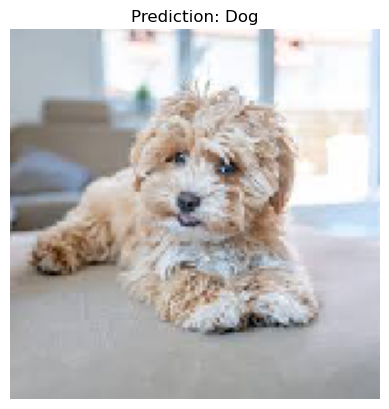

Prediction: Dog
Confidance: 0.9029251933097839
class_labels: ['Cat', 'Dog']


In [23]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the model
model = load_model('image_classification_model.h5')

# Constants for class labels
CLASS_NAMES = ["Cat", "Dog"]  # Modify based on your actual class labels
IMG_HEIGHT = 150  # Replace with your actual image height used during training
IMG_WIDTH = 150   # Replace with your actual image width used during training

# Function to display the image and make a prediction
def predict_and_display_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=-1)[0]
    confidence = np.max(prediction)

    # Determine the result
    if confidence > 0.5:  # You can adjust the threshold if needed
        result = CLASS_NAMES[predicted_class_index]
    else:
        result = "Nothing"

    # Display the image and prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {result}")
    plt.show()

    return result

# Test with a sample image
sample_image = 'C:/Users/ajeet/Downloads/archive (10)/download.jpg'  
result = predict_and_display_image(sample_image)
print(f"Prediction: {result}")
print(f"Confidance: {accuracy}")
print(f"class_labels: {CLASS_LABELS}")